In [54]:
import pandas as pd

Install this support Library:
- openpyxl:pip install openpyxl

In [55]:
pd.read_excel("datasets/Book1.xlsx",header=None)

,0,1,2,3,4
0,1,23,334,98,-10
1,2,56,341,56,54
2,3,56,342,12,-40
3,4,34,234,122,-30
4,5,12,563,45,5


In [56]:
# we can give name to header
pd.read_excel("datasets/Book1.xlsx",
              header=None,
              names=['#','col1','col2','col3','col4'])

,#,col1,col2,col3,col4
0,1,23,334,98,-10
1,2,56,341,56,54
2,3,56,342,12,-40
3,4,34,234,122,-30
4,5,12,563,45,5


In [57]:
df= pd.read_excel("datasets/Book1.xlsx",
              header=None,
              names=['#','col1','col2','col3','col4'],index_col=0
              )

In [58]:
df

,col1,col2,col3,col4
#,,,,
1,23,334,98,-10
2,56,341,56,54
3,56,342,12,-40
4,34,234,122,-30
5,12,563,45,5


In [59]:
df['col1'] # series

#
1    23
2    56
3    56
4    34
5    12
Name: col1, dtype: int64

In [60]:
df[['col1']] # dataframes

,col1
#,
1,23
2,56
3,56
4,34
5,12


In [61]:
df[['col1','col3']]

,col1,col3
#,,
1,23,98
2,56,56
3,56,12
4,34,122
5,12,45


In [62]:
df.iloc[0] # row

col1     23
col2    334
col3     98
col4    -10
Name: 1, dtype: int64

In [63]:
# use of numpy to add
print(df['col1'].sum())
print(df['col2'].mean())
print(df['col1'].min())

181
362.8
12


<Axes: xlabel='#'>

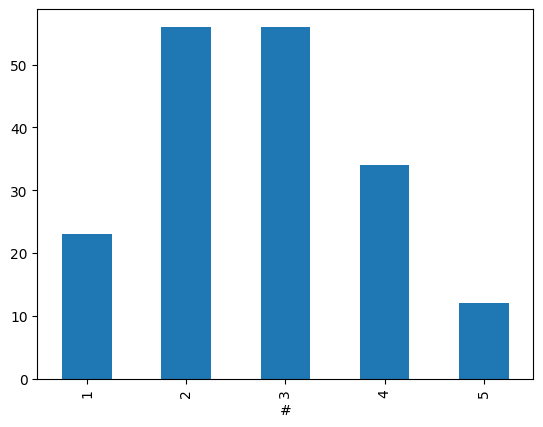

In [64]:
# use of visualisation
df.col1.plot(kind='bar')

<Axes: ylabel='Frequency'>

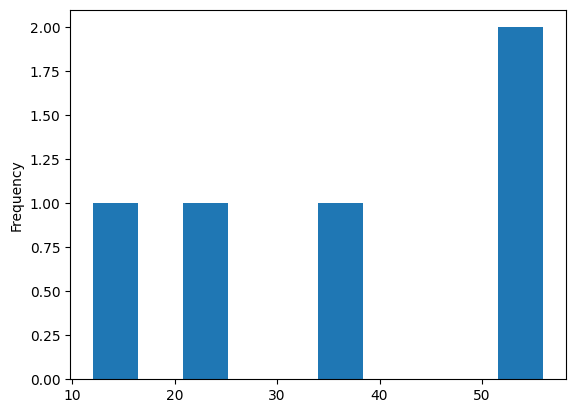

In [65]:
df.col1.plot(kind='hist')

<Axes: ylabel='Density'>

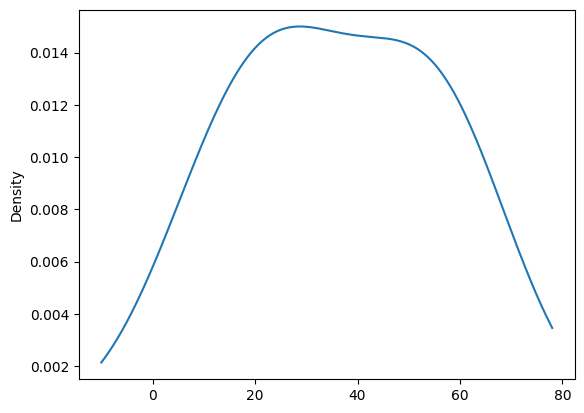

In [66]:
df.col1.plot(kind='kde')


<Axes: ylabel='col1'>

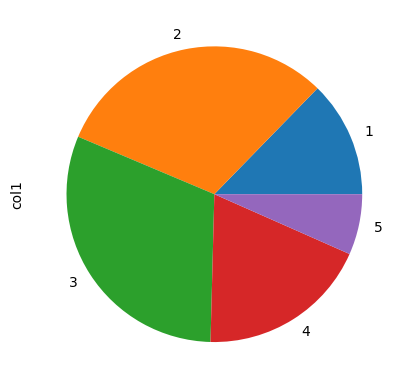

In [67]:
df.col1.plot(kind='pie')

Passing your manual data dictionary to pandas

In [68]:
data={
    'country':['Brazil','Russia','India','China'],
    'Population':[200.4,146.58,144.4,78],
    'gdp':[1.89,1.5,45.5,11.4],
    'area':[2555588,584121545,55444,555552],
}
cdf= pd.DataFrame(data)
cdf

,country,Population,gdp,area
0,Brazil,200.40,1.89,2555588
1,Russia,146.58,1.50,584121545
2,India,144.40,45.50,55444
3,China,78.00,11.40,555552


In [69]:
print(cdf['gdp'].mean())


15.0725


<Axes: xlabel='country'>

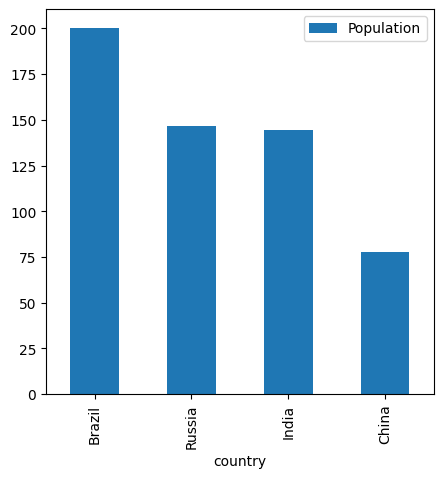

In [70]:
cdf.plot(kind='bar',x='country',y='Population',figsize=(5,5))

In [71]:
cdf.columns.tolist()

['country', 'Population', 'gdp', 'area']

<Axes: xlabel='country'>

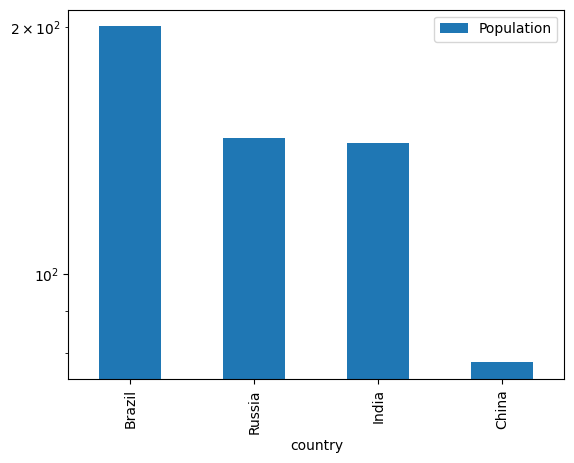

In [72]:
cdf.plot(kind='bar',x='country',y='Population',logy=True)

<Axes: xlabel='country'>

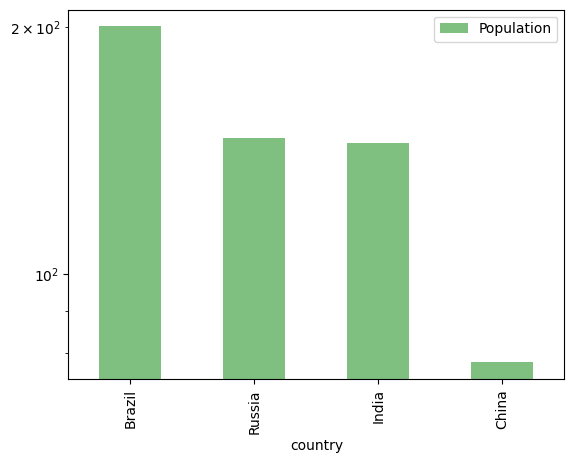

In [73]:
cdf.plot(kind='bar',x='country',y='Population',logy=True,
         color='green',
         alpha=0.5)
         

In [74]:
cdf.columns.tolist()

['country', 'Population', 'gdp', 'area']

pandas dataframe manipulation
- rename columns
- replace
- add new columns
- drop duplicate
- drop rows with missing values
- creating subsets
- merging dataframes

In [75]:
import numpy as np
df= pd.DataFrame({
    'Rank':[1,2,3,4,5,6,7,8,9,10],
    'countryname':['India','America','Australia','Brazil','Germany','Russia','France','Africa','Japan','china'],
    'currency':['Inr','USD',np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    
})
df

,Rank,countryname,currency
0,1,India,Inr
1,2,America,USD
2,3,Australia,NaN
3,4,Brazil,NaN
4,5,Germany,NaN
5,6,Russia,NaN
6,7,France,NaN
7,8,Africa,NaN
8,9,Japan,NaN
9,10,china,NaN


In [76]:
df.countryname

0        India
1      America
2    Australia
3       Brazil
4      Germany
5       Russia
6       France
7       Africa
8        Japan
9        china
Name: countryname, dtype: object

In [77]:
# Rename
df.rename(
    columns={
        'Rank':'rank',
        'countryname':'country'

    }
)

,rank,country,currency
0,1,India,Inr
1,2,America,USD
2,3,Australia,NaN
3,4,Brazil,NaN
4,5,Germany,NaN
5,6,Russia,NaN
6,7,France,NaN
7,8,Africa,NaN
8,9,Japan,NaN
9,10,china,NaN


In [78]:
df

,Rank,countryname,currency
0,1,India,Inr
1,2,America,USD
2,3,Australia,NaN
3,4,Brazil,NaN
4,5,Germany,NaN
5,6,Russia,NaN
6,7,France,NaN
7,8,Africa,NaN
8,9,Japan,NaN
9,10,china,NaN


In [79]:
df.iloc[9]=df.iloc[9].replace(np.nan,'YEN')

In [80]:
df

,Rank,countryname,currency
0,1,India,Inr
1,2,America,USD
2,3,Australia,NaN
3,4,Brazil,NaN
4,5,Germany,NaN
5,6,Russia,NaN
6,7,France,NaN
7,8,Africa,NaN
8,9,Japan,NaN
9,10,china,YEN


In [81]:
# adding  a Column
df['colx']=10

In [82]:
df

,Rank,countryname,currency,colx
0,1,India,Inr,10
1,2,America,USD,10
2,3,Australia,NaN,10
3,4,Brazil,NaN,10
4,5,Germany,NaN,10
5,6,Russia,NaN,10
6,7,France,NaN,10
7,8,Africa,NaN,10
8,9,Japan,NaN,10
9,10,china,YEN,10


In [83]:
values=[22,554,585,37,94,655,65,68,781,94]
df['coly']=values
df

,Rank,countryname,currency,colx,coly
0,1,India,Inr,10,22
1,2,America,USD,10,554
2,3,Australia,NaN,10,585
3,4,Brazil,NaN,10,37
4,5,Germany,NaN,10,94
5,6,Russia,NaN,10,655
6,7,France,NaN,10,65
7,8,Africa,NaN,10,68
8,9,Japan,NaN,10,781
9,10,china,YEN,10,94


In [84]:
# adding a columnn based on opertaion on other column 
df['colz']=df['colx']*df['coly']

In [85]:
df

,Rank,countryname,currency,colx,coly,colz
0,1,India,Inr,10,22,220
1,2,America,USD,10,554,5540
2,3,Australia,NaN,10,585,5850
3,4,Brazil,NaN,10,37,370
4,5,Germany,NaN,10,94,940
5,6,Russia,NaN,10,655,6550
6,7,France,NaN,10,65,650
7,8,Africa,NaN,10,68,680
8,9,Japan,NaN,10,781,7810
9,10,china,YEN,10,94,940


In [86]:
# updating a column based on opertion

df['coly']= df['coly'].apply(lambda x:x%10)
df

,Rank,countryname,currency,colx,coly,colz
0,1,India,Inr,10,2,220
1,2,America,USD,10,4,5540
2,3,Australia,NaN,10,5,5850
3,4,Brazil,NaN,10,7,370
4,5,Germany,NaN,10,4,940
5,6,Russia,NaN,10,5,6550
6,7,France,NaN,10,5,650
7,8,Africa,NaN,10,8,680
8,9,Japan,NaN,10,1,7810
9,10,china,YEN,10,4,940


In [87]:
# remove a column
df.drop(columns=['colx'])

,Rank,countryname,currency,coly,colz
0,1,India,Inr,2,220
1,2,America,USD,4,5540
2,3,Australia,NaN,5,5850
3,4,Brazil,NaN,7,370
4,5,Germany,NaN,4,940
5,6,Russia,NaN,5,6550
6,7,France,NaN,5,650
7,8,Africa,NaN,8,680
8,9,Japan,NaN,1,7810
9,10,china,YEN,4,940


In [88]:
df=df.drop(columns=['colx'])

In [89]:
df

,Rank,countryname,currency,coly,colz
0,1,India,Inr,2,220
1,2,America,USD,4,5540
2,3,Australia,NaN,5,5850
3,4,Brazil,NaN,7,370
4,5,Germany,NaN,4,940
5,6,Russia,NaN,5,6550
6,7,France,NaN,5,650
7,8,Africa,NaN,8,680
8,9,Japan,NaN,1,7810
9,10,china,YEN,4,940


In [90]:
df.drop_duplicates(subset=['coly'])

,Rank,countryname,currency,coly,colz
0,1,India,Inr,2,220
1,2,America,USD,4,5540
2,3,Australia,NaN,5,5850
3,4,Brazil,NaN,7,370
7,8,Africa,NaN,8,680
8,9,Japan,NaN,1,7810


In [101]:
can= pd.read_excel('C:/Users/HP/OneDrive/Documents/Copy of Canada(1).xlsx',
                   header=None)
can

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1.0,...,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0
214,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11.0,...,56.0,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0
215,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72.0,...,1450.0,615.0,454.0,663.0,611.0,508.0,494.0,434.0,437.0,407.0
216,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000.0,...,3739.0,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0


In [ ]:
adf= pd.DataFrame({
    'A':[1,2,3,4],
    'B':[5,6,7,8],
})
bdf= pd.DataFrame({
    'C':[2,3,5,1],
    'D':[6,7,8,9],
})
cdf= pd.DataFrame({
    'A':[5,6,7,8],
    'B':[9,10,11,12],
})